In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


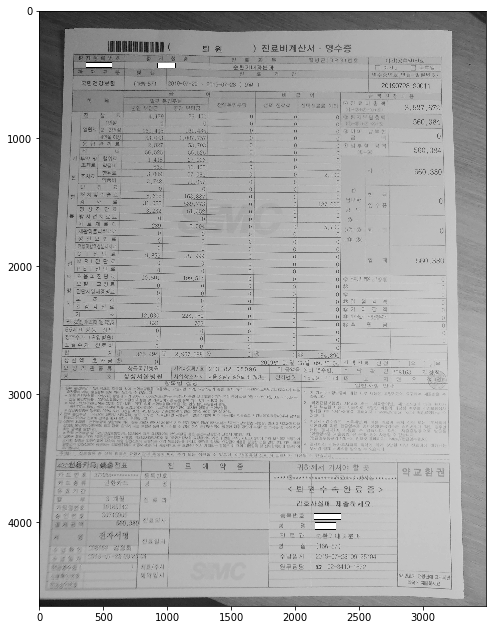

In [49]:
img = cv2.imread('ddw.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(8,16))
plt.imshow(gray, cmap='gray')

In [0]:
ret, th = cv2.threshold(gray, 130, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(10,20))
plt.imshow(th) 

In [0]:
ret, thres = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.figure(figsize=(8,16))
plt.imshow(thres, cmap='gray')

In [0]:
blur = cv2.GaussianBlur(gray, (5,5), sigmaX=0)

blur_thres = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 21, 5)
plt.figure(figsize=(8,16))
plt.imshow(blur_thres, cmap='gray')

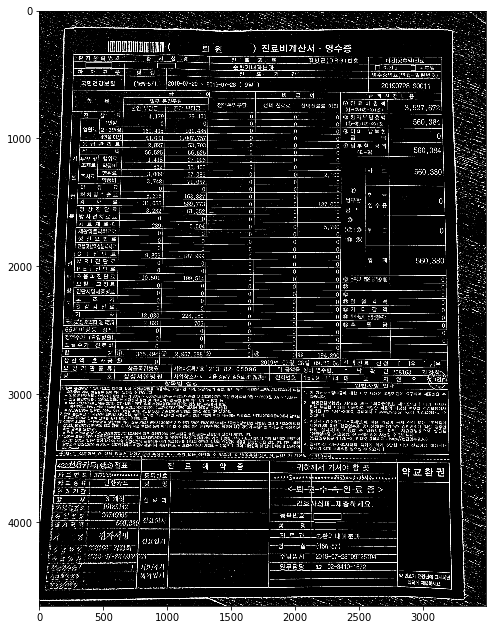

In [73]:
blur = cv2.GaussianBlur(blur_thres, (3,3), sigmaX=0)
plt.figure(figsize=(8,16))
plt.imshow(blur,cmap='gray')

In [0]:
contours = cv2.findContours(blur, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

In [77]:
contours[0]

array([[[2868, 4654]],

       [[2868, 4655]],

       [[2870, 4655]],

       [[2870, 4654]]], dtype=int32)

In [0]:
can = cv2.Canny(blur, 100,120)
plt.figure(figsize=(8,16))
plt.imshow(can)

In [0]:
adap = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 21, 3)
plt.figure(figsize=(8,16))
plt.imshow(adap, cmap='gray')

In [0]:
coords = np.column_stack(np.where(blur_thres > 0)) #조건에 맞는 좌표 짝 지어주기
angle = cv2.minAreaRect(coords)[-1]
# the `cv2.minAreaRect` function returns values in the
# range [-90, 0); as the rectangle rotates clockwise the
# returned angle trends to 0 -- in this special case we
# need to add 90 degrees to the angle
if angle < -45:
	angle = -(90 + angle)
# otherwise, just take the inverse of the angle to make
# it positive
else:
	angle = -angle

In [33]:
angle

3.254490613937378

In [0]:
adap.shape

(183, 276)

In [0]:
np.where(adap > 0)

(array([  2,   2,   3, ..., 255, 255, 255]),
 array([ 22,  27,  21, ..., 185, 186, 187]))

In [0]:
# rotate the image to deskew it
(h, w) = img.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle-1, 1.0)
rotated = cv2.warpAffine(img, M, (w, h),
	flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

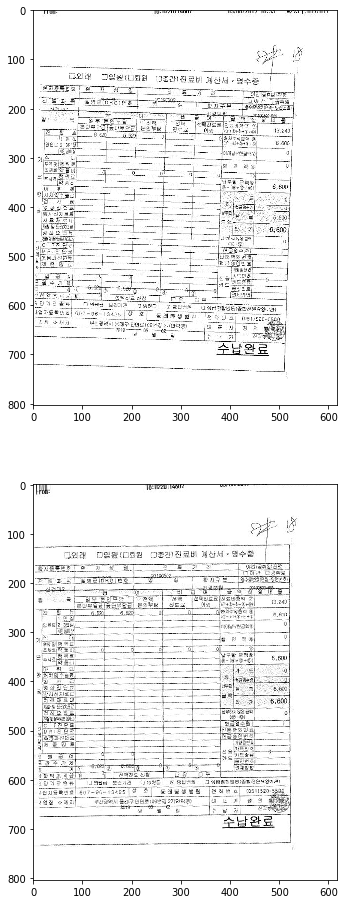

In [43]:
plt.figure(figsize=(8,16))
plt.subplot(2,1,1)
plt.imshow(img)
plt.subplot(2,1,2)
plt.imshow(rotated)

In [36]:
rotated.shape

(804, 619, 3)

True

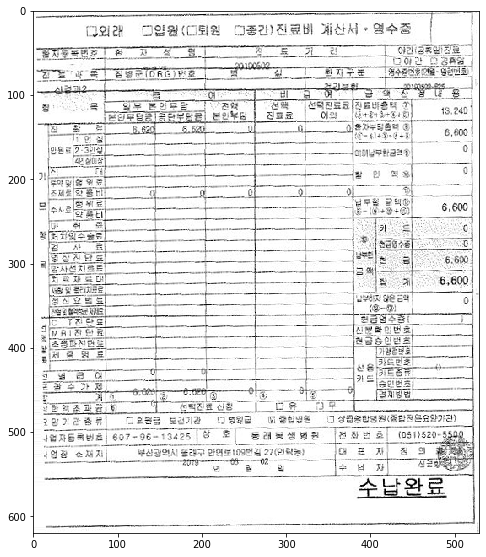

In [47]:
crop = rotated[120:740,:530]
plt.figure(figsize=(8,16))
plt.imshow(crop)
cv2.imwrite('receipt.jpg', crop)

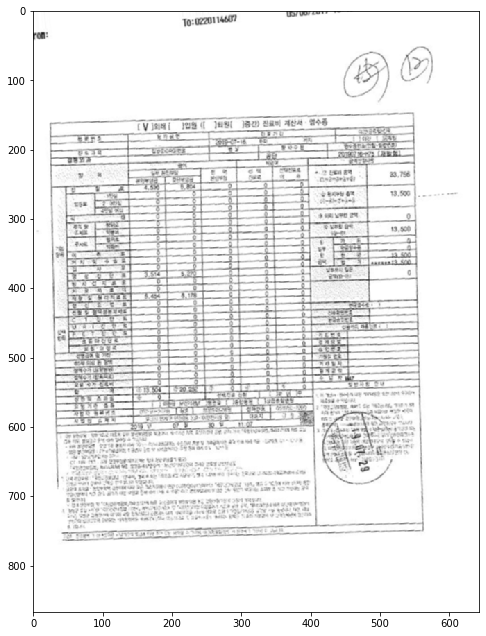

In [24]:
rg = cv2.GaussianBlur(rotated, (3,3),sigmaX=0)
plt.figure(figsize=(8,16))
plt.imshow(rg, cmap='gray')

In [0]:
a.shape

(3, 3)

In [0]:
np.where(a < 3)

(array([0, 0, 1, 2]), array([0, 2, 0, 1]))

In [0]:
a[[0,0,1,2],[0,2,0,1]]

array([2, 1, 1, 2])

In [0]:
image = cv2.imread('skewed.png',cv2.IMREAD_GRAYSCALE)


In [0]:
canny = cv2.Canny(image, 70, 127)

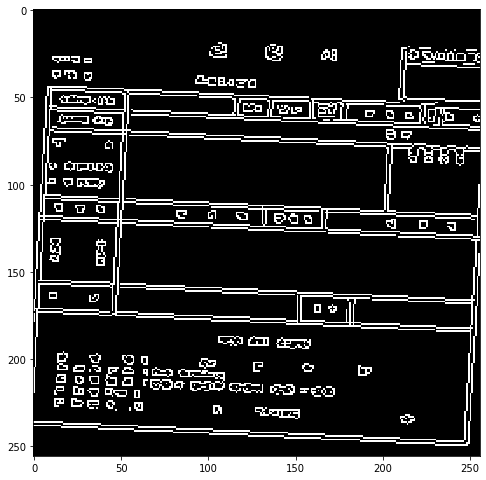

In [0]:
plt.figure(figsize=(8,16))
plt.imshow(canny, cmap='gray')